# Comprendre auto-codeurs de débruitage, et pourquoi les utiliser ?

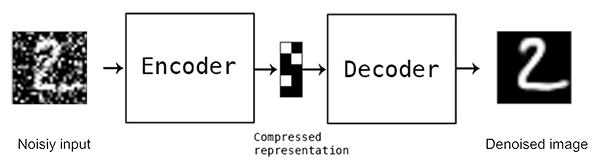

[Source](https://blog.keras.io/building-autoencoders-in-keras.html)

# Importation des packages

In [ ]:
import torch as torch
import numpy as np


from tensorflow.keras.datasets import mnist
from torch.utils.data import Dataset
from torchsummary import summary
import matplotlib.pyplot as plt
import cv2

# Importation des données

In [ ]:
# load the MNIST dataset
print("[INFO] loading MNIST dataset...")
((trainX, _), (testX, _)) = mnist.load_data()
# add a channel dimension to every image in the dataset, then scale
# the pixel intensities to the range [0, 1]
trainX = np.expand_dims(trainX, axis=-1)
testX = np.expand_dims(testX, axis=-1)
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

In [ ]:
print(trainX.shape)
print(testX.shape)

# Création du bruit

Utilisez la fonction np.random.normal pour générer une matrice de taille trainX.shape selon une loi normal centrer en 0.5 avec un écart type de 0.5 pour chacune des images de notre jeu d'entraînement et de test.

Aidez-vous de la [documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html).

In [ ]:
trainNoise = np.random.normal(loc=0.5, scale=0.5, size=trainX.shape)
testNoise = np.random.normal(loc=0.5, scale=0.5, size=testX.shape)

In [ ]:
plt.imshow(trainNoise[0, :, :, 0])
plt.show()

Appliquer le bruit sur les images pour créer le dataset d'entraînement et de test.

Garder les valeurs entre 0 et 1 en utilisant la fonction np.clip.

Aidez-vous de la [documentation](https://numpy.org/doc/stable/reference/generated/numpy.clip.html).

In [ ]:
trainXNoisy = np.clip(trainX + trainNoise, 0, 1)
testXNoisy = np.clip(testX + testNoise, 0, 1)

Regarder la différence entre l'image originale et l'image bruitée.

In [ ]:
plt.imshow(trainX[0, :, :, 0])
plt.show()
plt.imshow(trainXNoisy[0, :, :, 0])
plt.show()

# Création du générateur

In [ ]:
class CustomImageDataset(Dataset):
    def __init__(self, x_train, y_train):
        self.img_input = x_train
        self.img_output = y_train

    def __len__(self):
        return len(self.img_output)

    def __getitem__(self, idx):
        image = self.img_input[idx, :, :, :]
        label = self.img_output[idx, :, :, :]

        return image, label

In [ ]:
x_training = CustomImageDataset(torch.from_numpy(np.transpose(np.float32(trainXNoisy), (0, 3, 1, 2))),
                                 torch.from_numpy(np.transpose(np.float32(trainX), (0, 3, 1, 2))))

Utilisez la fonction `DataLoader` pour charger le jeu de données `x_training` avec une taille de batch de 32 et un mélange des données.

In [ ]:
dataloader_train = None

In [ ]:
for x, y in dataloader_train:
  print(x.shape)
  print(y.shape)
  break

In [ ]:
x_testing = CustomImageDataset(torch.from_numpy(np.transpose(np.float32(trainXNoisy), (0, 3, 1, 2))),
                                 torch.from_numpy(np.transpose(np.float32(trainX), (0, 3, 1, 2))))

Utilisez à nouveau la fonction `DataLoader` pour charger le jeu de données `x_testing` avec une taille de batch de 32 et un mélange des données.

In [ ]:
dataloader_test = None

In [ ]:
for x, y in dataloader_test:
  print(x.shape)
  print(y.shape)
  break

# Initialisation de l'encodeur

Initialisation des données

Créer

Créez une classe AutoEncoder en héritant de `torch.nn.Module` qui servira de base pour un modèle d'auto-encodeur.

Cette classe doit contenir un constructeur (`__init__`) permettant de configurer les dimensions d'entrée (width, height, depth) ainsi qu'une dimension latente (latentDim) qui représentera la taille de l'espace latent.

Dans le constructeur (`__init__`), initialisez la superclasse avec `super().__init__()`.

Sauvegardez chaque paramètre en tant qu'attribut de la classe.

In [ ]:
class AutoEncoder(torch.nn.Module):
  def __init__(self, width, height, depth, latentDim=16):
    ### Your code ###

In [ ]:
ae = AutoEncoder(28, 28, 1, 16)
print(ae.width)
print(ae.height)
print(ae.depth)
print(ae.latentDim)

Initialisation du modèle

Ajoutez à la classe init une classe `encoder_model` qui utilise la fonction `Sequantial` pour construire une architecture contenant les opérations suivantes:
- Convolutional avec 8 filtres et un filtre de 3 pixel de côté,
- Relu pour fonction d'activitation,
- Une couche de Flatten,
- Une couche linéaire avec 5408 neurones en entrée et `self.latentDim` en sortie.

In [ ]:
class AutoEncoder(torch.nn.Module):

  def encoder_model(self):

    self.encoder = None

    return self.encoder

In [ ]:
ae = AutoEncoder(28, 28, 1, 16)

Utilisez la fonction `summary` pour visualiser le modèle `ae`.

In [ ]:
None

Appliquez le modèle avec la méthode `forward`sur les données `x` et affichez la dimension de `latent_dim` grâce à la fonction `print`.

In [ ]:
for x, y in dataloader_train:

  latent_dim = None
  break

# Initialisation du décodeur

Initialisez maintenant le décoder avec la fonction `decoder_model`.

Grâce à la fonction `Sequential` initialisez l'architecture suivante:
- Une couche linéaire avec `self.latentDim` en entrée et 5408 neurones,
- Relu pour fonction d'activation,
- Unflatten avec la dimension de l'image dans l'encodeur avant la fonction flatten.
- Une ConvTransposed2d avec une filtre de 3 pixels de côté.

In [ ]:
class AutoEncoder(torch.nn.Module):

  def decoder_model(self):

    self.decoder = None

In [ ]:
ae = AutoEncoder(28, 28, 1, 16)

Visualisez le modèle avec la fonction `summary`

In [ ]:
summary(ae.decoder, (16,), device='cpu')

Utilisez la fonction `forward` pour obtenir `latentDim` et `prediction` en utilisant l'encoder et le décoder.

Afficher la dimension des résultats avec un print.

In [ ]:
for x, y in dataloader_train:
  latent_dim = None

  prediction = None
  break

# Ajout de la méthode `Forward`

Rassembler toutes les fonctions précédentes.

Créez la fonction foward qui va faire passer `input_data` dans l'encoder puis le décoder avant de le retourner via `return`

In [ ]:
class AutoEncoder(torch.nn.Module):

  def forward(self, input_data):
    latent_dim = None
    prediction = None

    return None

In [ ]:
model_ae = AutoEncoder(28, 28, 1, 16)

# Fonction d'entraînement

In [ ]:
def step(model:torch.nn.Sequential,
         opt:torch.optim,
         criterion:torch.nn.modules.loss,
         x_train:torch.Tensor,
         y_train:torch.Tensor)->tuple:
  """
  Executes a single training step for a PyTorch model.
  This function performs a forward pass to compute the model's predictions, calculates
  the loss between predictions and actual target values, computes gradients for each
  model parameter, and updates the parameters using the optimizer.

  Args:
      model (torch.nn.Sequential): The PyTorch model to train.
      optimizer (torch.optim.Optimizer): Optimizer used to update the model's parameters.
      criterion (torch.nn.modules.loss._Loss): Loss function used to compute the error.
      x_train (torch.Tensor): Input training data (features).
      y_train (torch.Tensor): Ground truth labels or target values for the training data.
  Returns:
      tuple: The updated model and the computed loss for the current step.
  """

  # Réinitialisez les gradients d'optimizer à zéro avec la méthode 'zero_grad'
  opt.zero_grad()

  # Calculez les prédiction sur le jeu d'entraînement avec la méthode 'froward'
  prediction = model.forward(x_train)

  # Calculez l'erreur de prédiction avec 'criterion'
  loss = criterion(prediction, y_train)

  # Calculez les gradients avec la méthode 'backward'
  loss.backward()

  # Mettre à jour les paramètres du modèle avec la méthode 'step'
  opt.step()

  return model, loss

In [ ]:
def fit(model, optimizer, criterion, epoch, trainloader, testloader):
    epoch = epoch
    history_train_loss = []
    history_test_loss = []

    for e in range(epoch) :

      train_loss_batch = 0
      test_loss_batch = 0

      for images, labels in trainloader:

        # mise à jour des poids avec la fonction 'step'
        model, train_loss = step(model, optimizer, criterion, images, labels)

        train_loss_batch += train_loss.detach().numpy()

      for images, labels in testloader:

        prediction = model.forward(images)

        test_loss = criterion(prediction, labels)

        test_loss_batch += test_loss.detach().numpy()

      train_loss_batch /= len(trainloader.sampler)
      test_loss_batch /= len(testloader.sampler)

      # Sauvegarde des coûts d'entraînement avec append
      history_train_loss = np.append(history_train_loss, train_loss_batch)
      history_test_loss = np.append(history_test_loss, test_loss_batch)

      print('train_loss : '+str(np.squeeze(train_loss_batch))+ ' test_loss : '+str(np.squeeze(test_loss_batch)))
      print('-------------------------------------------------------------------------------------------------')

    return model, history_train_loss, history_test_loss

# Entraînement du modèle

Initialisez `criterion` avec la fonction `L1Loss`.

Initialisez `optimizer` avec `Adam` et un learning rate de 0.001.

In [ ]:
criterion = None
optimizer = None

In [ ]:
epoch = 5

Utilisez la fonction `fit` pour entraîner le modèle.

In [ ]:
model, history_train_loss, history_test_loss = None

Regardez le résultat de l'entraînement du modèle sur la première observation du batch.

In [ ]:
for x, y in dataloader_train:
  print(x.shape)
  print(y.shape)

  plt.imshow(x[0, 0, :, :])
  plt.show()

  plt.imshow(y[0, 0, :, :])
  plt.show()

  pred = model_ae.forward(x[:1, :, :, :]).detach().numpy()
  plt.imshow(pred[0, 0, :, :])
  plt.show()
  break